In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Review: Monty Hall Problem
In the previous lecture, we discussed about the Monty Hall problem.

Recall the steps that we need to do:
1. Put prizes behind doors randomly
2. Pick a door
3. Monty opens a door
4. Reveal what was behind each door

### Step 1: Set Up Game

In [2]:
# Create doors labeled 1, 2, 3
doors = make_array(1, 2, 3)
doors

array([1, 2, 3])

In [3]:
# Create an array of prizes
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [4]:
def setup():
    """ Return a random game of Let's Make a Deal """
    return Table().with_columns(
    'Door', doors,
    'Prize', np.random.choice(prizes, 3, replace = False)
        # Recall 'replace = False' makes sure that a value that has been used can't be used anymore!
        # If this is not the case, np.random.choice could pick 'car' twice or multiple times
    )

a_game = setup()
a_game

Door,Prize
1,second goat
2,first goat
3,car


### Step 2: Pick a Door

In [5]:
a_guess = np.random.choice(doors)
a_guess

3

### Step 3: Monty Opens a Door

In [6]:
def behind(game, door):
    """ Return the prize behind the door """
    return game.where('Door', door).column('Prize').item(0)

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the second goat
Behind door number 2 is the first goat
Behind door number 3 is the car


In [7]:
def location(game, prize):
    """ Return the door that hides a prize """
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 3
The first goat is behind door number 2
The second goat is behind door number 1


In [8]:
def expose(game, guess):
    """ Return the door that Monty Hall opens to expose a goat"""
    guessed_prize = behind(game, guess)
    # If the guess is a door that leads to the 1st goat
    if guessed_prize == 'first goat':
        # Then Monty will have to reveal the 2nd goat
        monty = 'second goat'
    # If the guess is a door that leads to the 2nd goat
    elif guessed_prize == 'second goat':
        # Then Monty will have to reveal the 1st goat
        monty = 'first goat'
    # If the guess is a door that leads to the car
    else:
        # Monty can choose between 1st goat or 2nd goat
        monty = np.random.choice(['first goat', 'second goat'])
    return location(game, monty)

exposedDoor = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', exposedDoor, 'to expose the', behind(a_game, exposedDoor))

The contestant picked door 3 which hides the car
Monty Hall opens door 2 to expose the first goat


In [9]:
def other(guess, exposed):
    """ Return the door that isn't the guess or the exposed one"""
    return (1 + 2 + 3) - guess - exposed

remainingDoor = other(a_guess, exposedDoor)
print('The remaining door', remainingDoor, 'hides the', behind(a_game, remainingDoor))

The remaining door 1 hides the second goat


### Step 4: Reveal All Doors, Repeat
Let's simulate one game of the Monty Hall Problem. Create a list where:
* 1st element is the prize behind the the 1st guess
* 2nd element is the prize behind Monty's chosen door
* 3rd element is the prize behind the remaining door


In [10]:
game = setup()
guess = np.random.choice(doors) # Guess is the door number the player selected
monty = expose(game, guess) # 'monty' is the door number that Monty revealed
remain = other(guess, monty) # 'remain' is the last door remaining
[behind(game, guess), behind(game, monty), behind(game, remain)]

['car', 'first goat', 'second goat']

Let's say we want to do this simulation 10,000 times

In [11]:
simulationTable = Table(['Trial', 'Guess', 'Monty', 'Remaining'])
for i in np.arange(10000):
    game = setup()
    guess = np.random.choice(doors) # Guess is the door number the player selected
    monty = expose(game, guess) # 'monty' is the door number that Monty revealed
    remain = other(guess, monty) # 'remain' is the last door remaining
    simulationTable.append([i, behind(game, guess), behind(game, monty), behind(game, remain)])

simulationTable

Trial,Guess,Monty,Remaining
0,second goat,first goat,car
1,car,first goat,second goat
2,car,first goat,second goat
3,second goat,first goat,car
4,car,first goat,second goat
5,second goat,first goat,car
6,car,second goat,first goat
7,car,second goat,first goat
8,car,first goat,second goat
9,first goat,second goat,car


From the simulation, we can predict, from 10,000 games, how many times the player would guess 'car

In [12]:
guess_is_car = simulationTable.group('Guess')
guess_is_car

Guess,count
car,3334
first goat,3330
second goat,3336


(0, 6000)

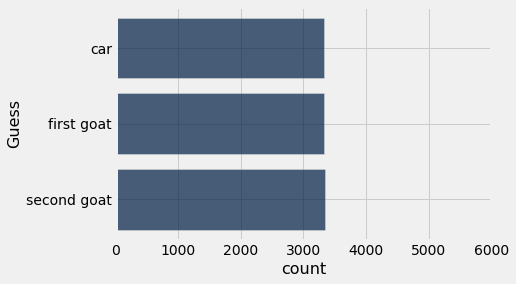

In [13]:
guess_is_car.barh('Guess')
plots.xlim(0, 6000) #sets the x axis to have range between 0 to 6000

and how many times the 'car' would actually be in the 'remaining door'

In [14]:
remaining_is_car = simulationTable.group('Remaining')
remaining_is_car

Remaining,count
car,6666
first goat,1658
second goat,1676


(0, 6000)

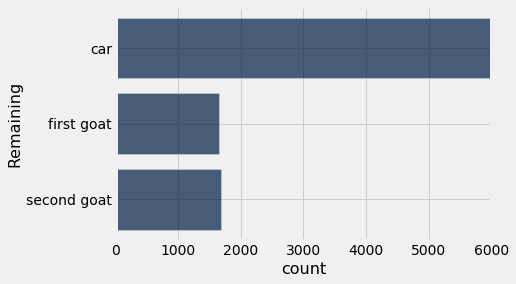

In [15]:
remaining_is_car.barh('Remaining')
plots.xlim(0, 6000)

And we can combine the histograms to see the comparison more clearly

In [16]:
# Step 1: Combine the separate tables and relabel them
combinedTable = guess_is_car.join('Guess', remaining_is_car, 'Remaining')
# Step 2: Relabel them
relabeled = combinedTable.relabeled(0, 'Prize').relabeled(1, 'Guess').relabeled(2, 'Remaining')
relabeled

Prize,Guess,Remaining
car,3334,6666
first goat,3330,1658
second goat,3336,1676


(0, 6000)

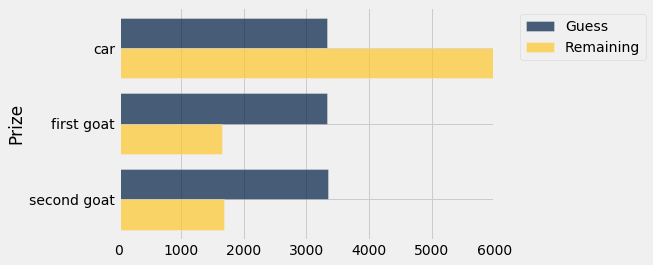

In [17]:
relabeled.barh(0)
plots.xlim(0, 6000)

# Probability (Video Lecture)
* Lowest value: 0
    * Chance of event that is impossible to happen
* Highest value: 1 (or 100%)
    * Chance of event that is certain to happen
* If an event has chance 70%, then chance that it won't happen is:
    * 100% - 70% = 30%
    * 1 - 0.7 = 0.3

## [Finding Probabilites](https://www.inferentialthinking.com/chapters/09/5/Finding_Probabilities) (Inferential Thinking - 9.5)
Over the centuries, there has been philosophical debates about what probabilities are. Some people think that probabilities are relative frequencies; others think they are long run relative frequencies; still others think that probabilities are a subjective measure of their own personal degree of uncertainty.

In this course, most probabilities will be relative frequencies, though many will have subjective interpretations. Regardless, the ways in which probabilities are calculated and combined are consistent across the different interpretations.

By convention, probabilities are numbers between 0 and 1, or, equivalently, 0% and 100%. Impossible events have probability 0. Events that are certain have probability 1.

Math is the main tool for finding probabilities, though computers are useful for this purpose too. Simulation can provide excellent approximations with high probability. In this section, we will informally develop a few simple rules that govern the calculation of probabilities. In subsequent sections we will return to simulations to approximate probabilities of complex events.

We will use the standard notation:
\begin{equation*}
P(Event)
\end{equation*}

  to denote the probability that `Event` happens, and we will use the words “chance” and “probability” interchangeably.

### When an Event Doesn't Happen
If the chance that event happens is 40%, then the chance that it doesn’t happen is 60%. This natural calculation can be described in general as follows:
\begin{equation*}
P(Doesnt) = 1 - P(Happen)
\end{equation*}

Where:
* P(Doesnt) = Probability that an event **does not happen**
* P(Happen) = Probabilty that an event **will happen**

### When All Outcomes are Equally Likely
When you roll a die, a natural assumption is that all 6 faces are equally likely. Then probabilities of how one roll comes out can be easily calculated as a ratio. For example
* The chance that the die shows an even number is 3/6 (2, 4, 6)
* The chance that the die shows a multiple of 3 is 2/6 (3, 6)

## Equally Likely Outcomes
Assuming all outcomes are equally likely, the chance of an event A is:

\begin{equation*}
P(A)   = \frac{A}{Total}
\end{equation*}

Where:
* A = Number of outcomes that make A happen
* Total = Total number of outcomes

## Fraction of a Fraction: When 2 Events Must Both Happen
<img src='fraction.jpg' width = 400/>
Suppose you're in a class. The professor distributes boxes to each student in the classes. Each boxes contain 3 tickets: red, blue, and green.

**What is the chance you get the green ticket first, followed by the red one?**

There are 6 possible pairs of colors: RB, BR, RG, GR, BG, GB (we’ve abbreviated the names of each color to just its first letter). All of these are equally likely by the sampling scheme, and only one of them (GR) makes the event happen.

\begin{equation*}
P(GR)   = \frac{GR}{RB, BR, RG, GR, BG, GB} = \frac{1}{6}
\end{equation*}

There's another way of getting the answer, by thinking about the event in **2 stages**.

### Multiplication Rule
Chance that 2 events A and B both happen:
\begin{equation*}
P(A) \times P(A -> B)
\end{equation*}

1. P(A) = Probability that A would happen
2. P(A -> B) = Probability that B would happen given that A has happened

* The final result is **less than or equal to** each of the 2 chances being multiplied
* The more conditions you have to fulfill, the less likely you'll satisfy them all

#### Stage 1
The professor says to the class that whoever gets the green card stays in the class, while the rest must leave the class. This has `1/3` chance.

#### Stage 2
Next, the professor says that whoever gets the red card stays in the class.
Among the `1/3` of repetitions when green is drawn previously, the red ticket has to be drawn next. This has `1/2` chance.

#### Multiplication
The chance of getting green, then red is:
\begin{equation*}
P(G->B) = \frac{1}{2} of \frac{1}{3} = \frac{1}{3} \times \frac{1}{2} = \frac{1}{6}
\end{equation*}

The factor of `1/2` is called “ the conditional chance that the red ticket appears second, given that the green ticket appeared first.”

Thus, when there are 2 conditions – one event must happen, as well as another – the chance is a fraction of a fraction, which is smaller than either of the two component fractions. The more conditions that have to be satisfied, the less likely they are to all be satisfied.

## When an Event Can Happen in 2 Different Ways
Suppose instead we want the chance that one of the 2 tickets is green and the other red. This event doesn’t specify the order in which the colors must appear, so they can appear in either order.

A good way to tackle problems like this is to partition the event so that it can happen in exactly one of several different ways. The natural partition of “one green and one red” is GR and RG, in which each has a chance of `1/6`. 

### Addition Rule
If event A can happen in exactly one of the 2 ways, then:
\begin{equation*}
P(A) = P(1st) + P(2nd)
\end{equation*}

where *P(1st)* and *P(2nd)* is the 1st and 2nd way, respectively.

Thus, when an event can happen in one of two different ways, the chance that it happens is a sum of chances, and hence bigger than the chance of either of the individual ways.

The multiplication rule has a natural extension to more than two events, as we will see below. So also the addition rule has a natural extension to events that can happen in one of several different ways.


## Example: At Least One Head
Data scientists often work with random samples from populations. A question that sometimes arises is about the likelihood that a particular individual in the population is selected to be in the sample. To work out the chance, that individual is called a “success,” and the problem is to find the chance that the sample contains a success.

If you toss a coin twice, there are four equally likely outcomes: HH, HT, TH, and TT. We have abbreviated “Heads” to H and “Tails” to T. The chance of getting at least one head in two tosses is therefore 3/4 (HH, HT, TH).

Another way of coming up with this answer is to calculate the chances you don’t get at least one head: both the tosses have to land tails.

\begin{equation*}
P(1H) = 1-P(TT) = 1 - \frac{1}{4} = \frac{3}{4}
\end{equation*}

Notice also that by multiplication rule,
\begin{equation*}
P(TT) = \frac{1}{4} = \frac{1}{2} \times \frac{1}{2} = (\frac{1}{2})^2
\end{equation*}

This way, the chance of getting at least one head in 17 coin tosses would be:
\begin{equation*}
P(1H) = 1-P(17T) = 1 -  (\frac{1}{2})^{17}
\end{equation*}

# Sampling
An important part of data science consists of making conclusions based on the data in random samples. In order to correctly interpret their results, data scientists have to first understand exactly what random samples are.

In this chapter we will take a more careful look at sampling, with special attention to the properties of large random samples. We'll analyze the `top_movies.csv` data set.

In [18]:
top1 = Table.read_table('top_movies.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')

top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
1,Avatar,Fox,"760,507,625","846,120,800",2009
2,Titanic,Paramount,"658,672,302","1,178,627,900",1997
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
4,Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
5,The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
6,Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
7,Star Wars,Fox,"460,998,007","1,549,640,500",1977
8,Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
9,The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


## Sampling Rows of a Table
Each row of a data table represents an individual; in top, each individual is a movie. Sampling individuals can thus be achieved by sampling the rows of a table.

The contents of a row are the values of different variables measured on the same individual. So the contents of the sampled rows form samples of values of each of the variables.

### Deterministic Sample
When you specify which elements of a set you want to choose, without any chances involved, you create a **deterministic sample**.

We have done this previously, for example by using `take`:

In [19]:
top.take(make_array(3, 18, 100))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
18,Spider-Man,Sony,"403,706,375","604,517,300",2002
100,Gone with the Wind,MGM,"198,676,459","1,757,788,200",1939


Or using `where`

In [20]:
top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,"381,011,219","417,512,200",2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,"317,575,550","486,442,900",2001
54,Harry Potter and the Half-Blood Prince,Warner Bros.,"301,959,197","352,098,800",2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,"292,004,738","369,250,200",2007
62,Harry Potter and the Goblet of Fire,Warner Bros.,"290,013,036","393,024,800",2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,"261,988,482","390,768,100",2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,"249,541,069","349,598,600",2004


Above are not random samples since they don’t involve chance.

### Probability Samples
Before the sample is drawn, you have to know the selection probability of every group of people in the population.
* `population` = the set of all elements from whom a sample will be drawn
* `probability sample` is one for which it's possible to calculate, before the sample is drawn, the chance with which any subset of elements will enter the sample

In a probability sample, all elements don't need to have the same chance of being chosen.

#### Random Sampling Scheme
Suppose you choose 2 people from 3 people: A, B, C. The guideline is as the following:

* A is chosen with probability 1
* B or C is chosen according to a toss of coin
    * Heads = B
    * Tails = C

This is a probability sample of size 2. The chances of entry for all non-empty subsets are:

* A : 1
* B : 1/2
* C : 1/2
* AB : 1/2
* AC : 1/2
* BC : 0
* ABC : 0

A has a higher chance of being selected than B or C (indeed, A is certain to be selected). Since these differences are known and quantified, they can be taken into account when working with the sample.

#### Systematic Sample
Imagine all the elements of the population listed in a sequence. One method of sampling starts by choosing a random position early in the list, and then evenly spaced positions after that. The sample consists of the elements in those positions. Such a sample is called a **systematic sample**.

Here we will choose a systematic sample of the rows of top. We will start by picking one of the first 10 rows at random, and then we will pick every 10th row after that.

In [21]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

# Run this cell multiple times to see how the output varies

start = np.random.choice(np.arange(10))
top.take(np.arange(start, top.num_rows, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
10,Shrek 2,Dreamworks,"441,226,247","618,143,100",2004
20,Transformers: Revenge of the Fallen,Paramount/Dreamworks,"402,111,870","468,938,100",2009
30,Furious 7,Universal,"353,007,020","356,907,000",2015
40,Shrek the Third,Paramount/Dreamworks,"322,719,944","408,090,600",2007
50,Independence Day,Fox,"306,169,268","602,639,200",1996
60,"The Chronicles of Narnia: The Lion, the Witch and the Wa ...",Buena Vista (Disney),"291,710,957","393,033,100",2005
70,The Incredibles,Buena Vista (Disney),"261,441,092","365,660,600",2004
80,Bruce Almighty,Universal,"242,829,261","350,350,700",2003
90,Mrs. Doubtfire,Fox,"219,195,243","458,354,100",1993


This systematic sample is a **probability sample**. In this scheme, all rows have chance of `1/10` of being chosen. For example, Row 23 is chosen if and only if Row 3 is chosen, and the chance of this happening is `1/10`.

Not all subsets have the same chance of being chosen. Because the selected rows are evenly spaced, most subsets of rows have no chance of being chosen. The only subsets that are possible are those that consist of rows all separated by multiples of 10. Any of those subsets is selected with chance 1/10. Other subsets, like the subset containing the first 11 rows of the table, are selected with chance 0.

### Sample of Convenience
**Example: sample consists of whoever walksby**
* Just because you think you're sampling "at random", doesn't mean you are
* If you can't figure out these ahead of time, then you don't have a random sample:
    * What's the population
    * What's the chance of selection, for each group in the population


# Distributions
Experiment: roll a die multiple times and keeping track of which face appears. The table `die` contains the numbers of spots on the faces of a die. All the numbers appear exactly once, as we are assuming that the die is fair.

In [22]:
die = Table().with_column('Face', np.arange(1, 7, 1))
die

Face
1
2
3
4
5
6


## Probability Distribution
* Random quantity with various possible values
* "Probability distribution"
    * All the possible values of the quantity
    * The probability of each of those values
* In some cases, the probability distribution can be solved mathematically without ever generating (or simulating) the random quantity

The histogram below helps us visualize the fact that every face appears with probability `1/6`. We say that the histogram shows the distribution of probabilities over all the possible faces. Since all the bars represent the same percent chance, the distribution is called uniform on the integers 1 through 6.

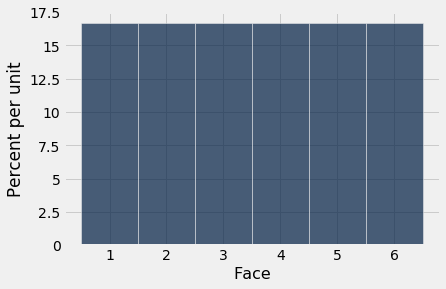

In [23]:
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

Variables whose successive values are separated by the same fixed amount, such as the values on rolls of a die (successive values separated by 1), fall into a class of variables that are called `discrete`. The histogram above is called a `discrete histogram`. Its bins are specified by the array `die_bins` and ensure that each bar is centered over the corresponding integer value.

The die can’t show 1.3 spots, or 5.2 spots – it always shows an integer number of spots. But our visualization spreads the probability of each value over the area of a bar. While this might seem a bit arbitrary at this stage of the course, it will become important later when we overlay smooth curves over discrete histograms.

The probability of each face is `1/6`, which is 16.67% when rounded to 2 decimal places. The width of each bin is 1 unit. So the height of each bar is 16.67% per unit. This agrees with the horizontal and vertical scales of the graph.

## Empirical Distribution
The distribution above consists of the **theoretical** probability of each face. It is not based on data. It can be studied and understood without rolling any dice.

Empirical distributions, on the other hand, are distributions of observed data. They can be visualized by empirical histograms. In data science, the word **empirical** means **observed**.

Let us get some data by simulating rolls of a die. This can be done by sampling at random with replacement from the integers 1 through 6. Previously we used `np.random.choice` for such simulations, but now we will use a **Table** method.

The table method `sample` draws at random with replacement from the rows of a table. Its argument is the **sample size**, and it returns a table consisting of the rows that were selected. An optional argument `with_replacement = False` specifies that sample should be drawn without replacement, but that is not the case with rolling a die.

Here are the results of 100 rolls of a die.

In [24]:
die.sample(100)

Face
6
3
2
2
3
6
4
4
6
2


We can use the same method to simulate as many rolls as we like, then we can draw empirical histograms of the result. Since we are going to do this repeatedly, we define the function `empirical_hist_die` that takes in **sample size** as its argument. This function rolls the die as many times as its argument then draws a histogram.

In [25]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)

## Empirical Histograms
Below is an empirical histogram of 10 rolls.

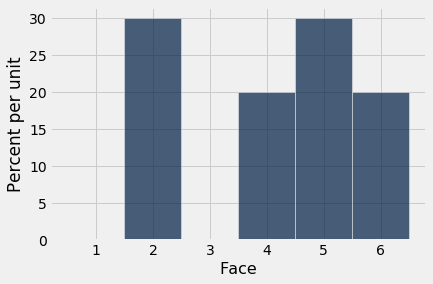

In [26]:
# Run cell multiple times to see variability
empirical_hist_die(10)

Notice that the histogram above doesn't look like the probability histogram we created previously. However, when the sample size increases, the empirical histogram begins to look more like that of the theoretical probabilities.

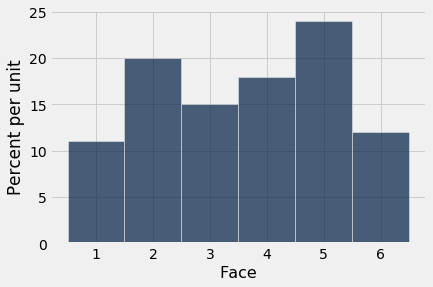

In [27]:
empirical_hist_die(100)

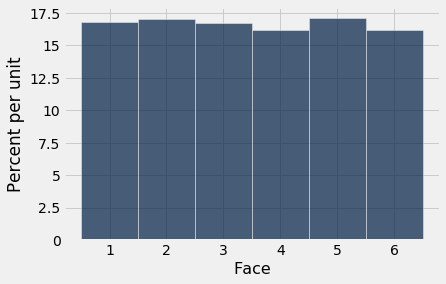

In [28]:
empirical_hist_die(1000)

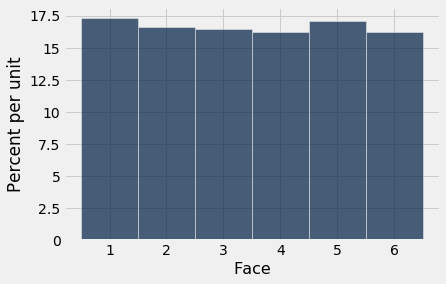

In [29]:
empirical_hist_die(10000)

As we increase the number of rolls in the simulation, the area of each bar gets closer to 16.67%, which is the area of each bar in the probability histogram.

## The Law of Averages
If a chance experiment is repeated many times, independently and under identical conditions, then the proportion of times that an event occurs gets closer to the theoretical probability of the event.

As you increase the number of rolls of a die, the proportion of times you get 5 is closer to `1/6`

"Independently and under identical conditions" means that every repetition is performed in the same way regardless of the results of all other repetitions

### Large Random Samples
If the sample size is large, then the empirical distribution of a uniform random sample resembles the distribution of the population with high probability.